In [ ]:
# %matplotlib qt
%matplotlib ipympl

In [ ]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

import cv2
import easyocr

from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.widgets import  Slider

In [ ]:
VIDEO_PATH = "Videos/Start1.avi"

In [ ]:
CAP = cv2.VideoCapture(VIDEO_PATH)
FPS = CAP.get(cv2.CAP_PROP_FPS)
LENTH = int(CAP.get(cv2.CAP_PROP_FRAME_COUNT) / FPS)


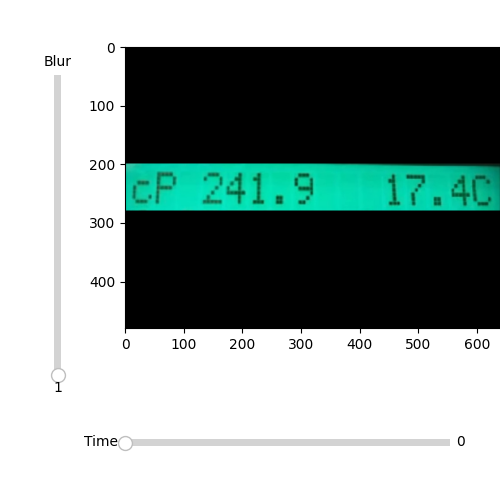

In [39]:
# Preprocess


def image_process(img):
    return img


fig, ax = plt.subplots()
fig.set_size_inches(5,5)
# fig.subplots_adjust(left=0,right=1,bottom=0.0,top=1,hspace=0,wspace=0)
fig.subplots_adjust(left=0.25,right=1,bottom=0.25,top =1,hspace=0,wspace=0)
# del ax.xaxis, ax.yaxis

CAP.set(cv2.CAP_PROP_POS_FRAMES, 0)
_, START_FRAME = CAP.read()
PLOT = ax.imshow(START_FRAME)

ax_time_slider = fig.add_axes([0.25, 0.1, 0.65, 0.03])

TIME_slider = Slider(
    ax=ax_time_slider,
    label='Time',
    valmin=0,
    valmax=LENTH,
    valinit=0,
    valstep=1,
)
BLUR =1
ax_blur_slider = fig.add_axes([0.1, 0.25, 0.03, 0.6])
BLUR_slider = Slider(
    ax=ax_blur_slider,
    orientation='vertical',
    label='Blur',
    valmin=BLUR,
    valmax=20,
    valinit=1,
    valstep=1,
)

def update(val):
    time = TIME_slider.val
    global BLUR
    BLUR =BLUR_slider.val 
    CAP.set(cv2.CAP_PROP_POS_FRAMES, int(FPS*time))
    _, frame = CAP.read()
    frame =cv2.blur(frame,(BLUR,BLUR))
    
    PLOT.set_data(frame)
    PLOT.autoscale()

    fig.canvas.draw_idle()
    
TIME_slider.on_changed(update)
BLUR_slider.on_changed(update);
plt.show()

In [40]:
# input('Continue to selection?')
print(f'Blur value= {BLUR}')

Blur value= 8


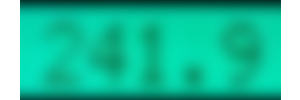

In [57]:
# Selection
START_FRAME = cv2.blur(START_FRAME, (BLUR, BLUR))


def strict(image, x, y, w, h):
    return image[y:y + h, x:x + w]


SLICE_CORDS = []
values_to_recognize= int(input('Valaues to recognize: '))

for i in range(values_to_recognize):
    current_slice = cv2.selectROI(
        f'Select {len(SLICE_CORDS)+1}',
        START_FRAME,
        fromCenter=False,
        showCrosshair=True,
    )
    SLICE_CORDS.append(current_slice)
cv2.destroyAllWindows()

fig, axes = plt.subplots(nrows=values_to_recognize)
if not isinstance(axes,np.ndarray): axes = [axes]
fig.set_size_inches(3,1*values_to_recognize)
fig.subplots_adjust(left=0,right=1,bottom=0.0,top=1,hspace=0,wspace=0)
start_slices=  [strict(START_FRAME,*params) for params in SLICE_CORDS]
for i in range(values_to_recognize):
    axes[i].set_axis_off()
    axes[i].imshow(start_slices[i])

# Recognize

In [ ]:
cap = cv2.VideoCapture("Videos/Full_font2.avi")

In [ ]:
## Saving
# fps =int(cap.get(cv2.CAP_PROP_FPS))
# diap = tqdm(iterable=range(0,fps*40,fps))
# for i in diap:
#     cap.set(cv2.CAP_PROP_POS_FRAMES, i)
#     ret, frame = cap.read()
#     if ret:
#         cv2.imwrite(f"Images/frame{int(i/fps)}.jpg",frame)

In [ ]:
def recognize(image, thresh):
    frame_2color = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh, frame_bw = cv2.threshold(frame_2color, thresh, 255,
                                     cv2.THRESH_BINARY)
    return tes.image_to_string(frame_bw), frame_bw


In [ ]:
# Check
THRESH = 147

cap = cv2.VideoCapture("Videos/Full_font2.avi")
pdf_file = PdfPages('Full_font2.pdf')

fps = int(cap.get(cv2.CAP_PROP_FPS))
diap = tqdm(iterable=range(0, fps * 40, fps))

for i in diap:
    cap.set(cv2.CAP_PROP_POS_FRAMES, i)
    ready, frame = cap.read()
    text, frame_treated = recognize(frame, thresh=THRESH)
    text = text.replace('\n', '')
    text = f"t={i/fps: .1f}|{text}"
    if ready:
        fig, (ax_row, ax_treated) = plt.subplots(ncols=2)

        ax_row.imshow(frame)
        ax_treated.imshow(frame_treated)
        ax_row.text(0, 0, text, fontsize=15)

        fig.savefig(pdf_file, format='pdf')
        plt.close()
pdf_file.close()

# One frame tests

In [ ]:
cap = cv2.VideoCapture()
cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
ready, frame = cap.read()
frame = frame
# [200:280]
plt.imshow(frame)

In [ ]:
frame2 = frame[:, :, :]
frame2 = (frame2 + 1) % 256
plt.imshow(frame2)

In [ ]:
reader = easyocr.Reader(['en'])

In [ ]:
result = reader.readtext(frame)

# test easy ocr

In [ ]:
cap = cv2.VideoCapture("Videos/Start5.avi")
pdf_file = PdfPages('Easy_Start5_test.pdf')

fps = int(cap.get(cv2.CAP_PROP_FPS))
video_len = int(cap.get(cv2.CAP_PROP_FRAME_COUNT) / fps)

diap = tqdm(iterable=range(fps * 87, fps * 89, int(fps / 5)))
try:
    for i in diap:
        cap.set(cv2.CAP_PROP_POS_FRAMES, i)
        ready, frame = cap.read()
        frame = frame[100:142]
        result = reader.readtext(frame)

        if ready:
            fig, ax = plt.subplots()

            ax.imshow(frame)
            text_result = ' -- '.join([
                f'{value}({confidence*100:.0f})'
                for _, value, confidence in result
            ])
            ax.set_title(f'T= {round(i/fps,1)}  R= {text_result}')

            fig.savefig(pdf_file, format='pdf')
            plt.close()
except:
    print('Error has been detected')
finally:
    pdf_file.close()

In [ ]:
' '.join([value for _, value, confidence in result])


# cut picture

In [ ]:
import plotly.express as px
from skimage import data

img = data.chelsea()
fig = px.imshow(img)
# fig.add_annotation(
#     x=0.5,
#     y=0.9,
#     text="Drag and draw annotations",
#     xref="paper",
#     yref="paper",
#     showarrow=False,
#     font_size=20, font_color='cyan')
# Shape defined programatically
# fig.add_shape(
#     type='rect',
#     x0=230, x1=290, y0=230, y1=280,
#     xref='x', yref='y',
#     line_color='cyan'
# )
# Define dragmode, newshape parameters, amd add modebar buttons


# fig.update_layout(dragmode='drawrect', newshape=dict(line_color='cyan'))

fig.show(config={'modeBarButtonsToAdd': ['drawrect', 'eraseshape']})


In [ ]:
import plotly.graph_objs as go
from plotly.colors import n_colors

# Загрузка изображения
img = go.Image(z=frame)

# Определение области, которую нужно обрезать
clip_path = go.Scatter(
    x=[100, 300, 300, 100],
    y=[100, 100, 300, 300],
    fill='toself'
)

# Определение фигуры с изображением и обрезанной областью
fig = go.Figure(data=[img])
fig.update_layout(width=600, height=600)
fig.update_layout(images=[dict(
    data=img,
    xref='x',
    yref='y',
    x=clip_path.x[0],
    y=clip_path.y[0],
    sizex=clip_path.x[2] - clip_path.x[0],
    sizey=clip_path.y[2] - clip_path.y[0],
    sizing='stretch',
    opacity=1.0,
    layer='below',
    # sourcetype='image',
    # sourceopacity=1.0,
    # clippath=f"test.jpg",
    # cliponaxis=False
)])

# Определение цветов для обрезки
colors = n_colors('rgb(255, 0, 0)', 'rgb(0, 0, 255)', 10)

# Определение состояния для обрезки
state = {'color': 0}

# Обработчик событий для кликов мыши
def handle_click(trace, points, state):
    if len(points.point_inds) > 0:
        state['color'] = (state['color'] + 1) % len(colors)
        color = colors[state['color']]
        fig.update_traces(patch=dict(fillcolor=color))

# Добавление обработчика событий для кликов мыши
fig.data[0].on_click(lambda trace, points, state: handle_click(trace, points, state))

# Отображение фигуры
fig.show()